# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [2]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8)

pd.options.mode.chained_assignment = None

# Create a new dataframe from your CSV

df=pd.read_csv('C:/Users/emmag/Desktop/Women+/cleaning-data/Womens Clothing E-Commerce Reviews.csv')

In [3]:
# Print out any information you need to understand your dataframe
print(df.head())
print(df.shape)
print(df.dtypes)
print(df.columns)
df.describe()

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

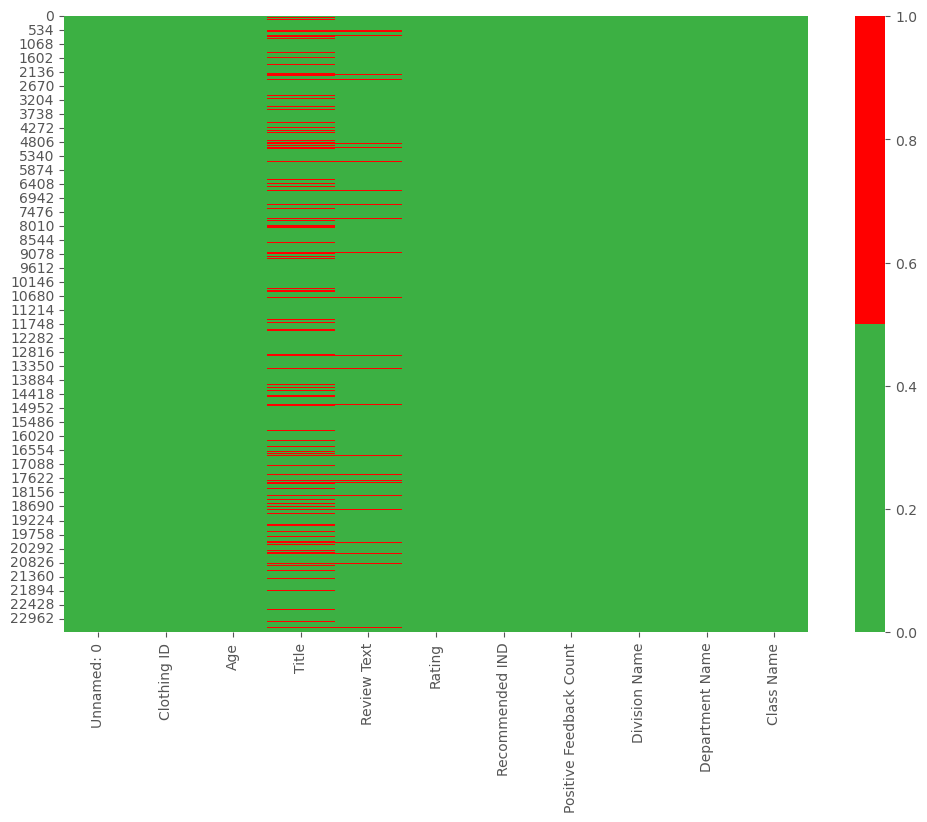

In [4]:
# Plot a heatmap of any missing data
colors = ['#3CB043','#FF0000']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors))


In [5]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print("{} - {}%".format(col, round(pct_missing*100)))


Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

created missing indicator for Title
created missing indicator for Review Text
created missing indicator for Division Name
created missing indicator for Department Name
created missing indicator for Class Name


<Axes: xlabel='index'>

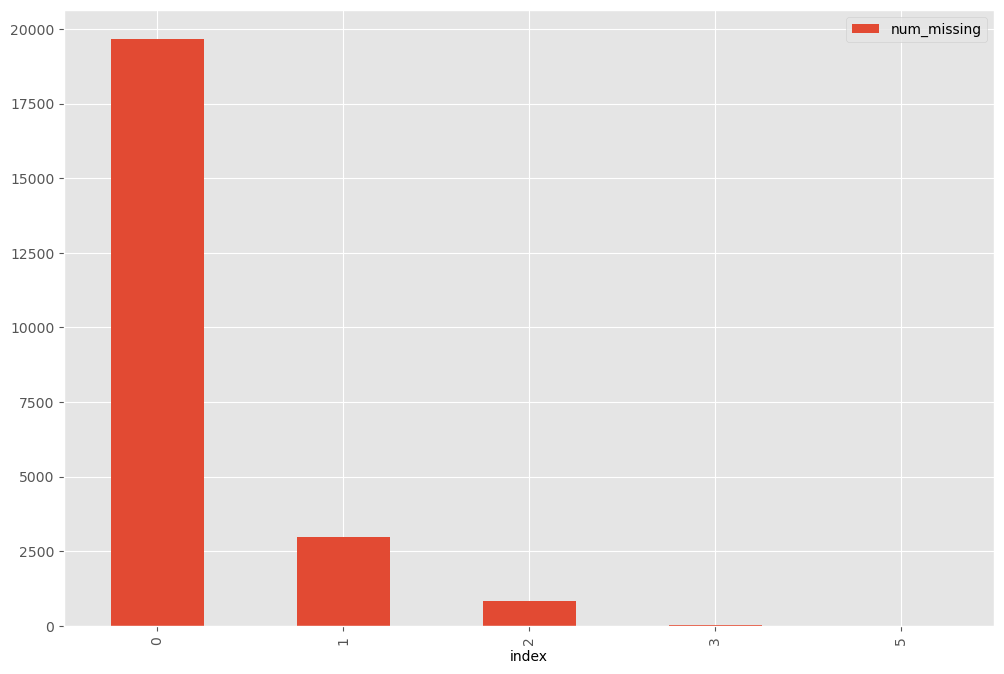

In [18]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing=np.sum(missing)
    
    if num_missing > 0:
        print(f'created missing indicator for {col}')
        df [f'{col}_ismissing']=missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [28]:
# Handle any missing data in your dataframe. While difficult to determine the impact of deleting observations without knowing the business question behind the data, my plan is to delete any observation with two or more values missing (this will target reviews missing a title and a review body). Eliminated 14 observations

ind_missing = df[df['num_missing'] > 2].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
print(df.shape)
print(df_less_missing_rows.shape)


(23486, 17)
(23472, 17)


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

count    23472.000000
mean        43.200707
std         12.280913
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64


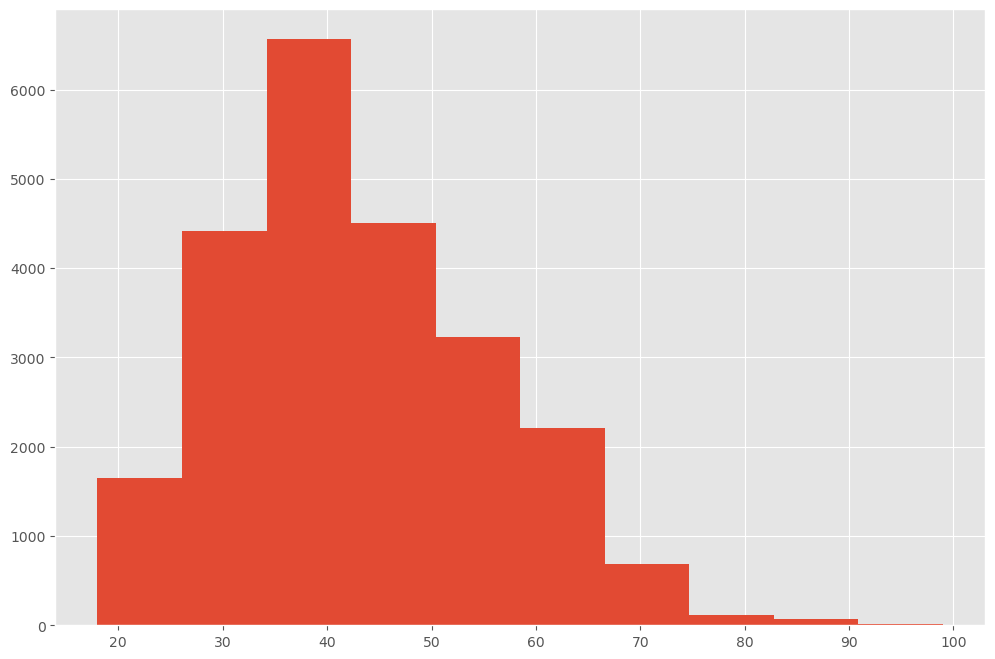

In [40]:
# Plot a histogram to see if there are any outliers.
df_less_missing_rows["Age"].hist()
print(df_less_missing_rows["Age"].describe())

<Axes: >

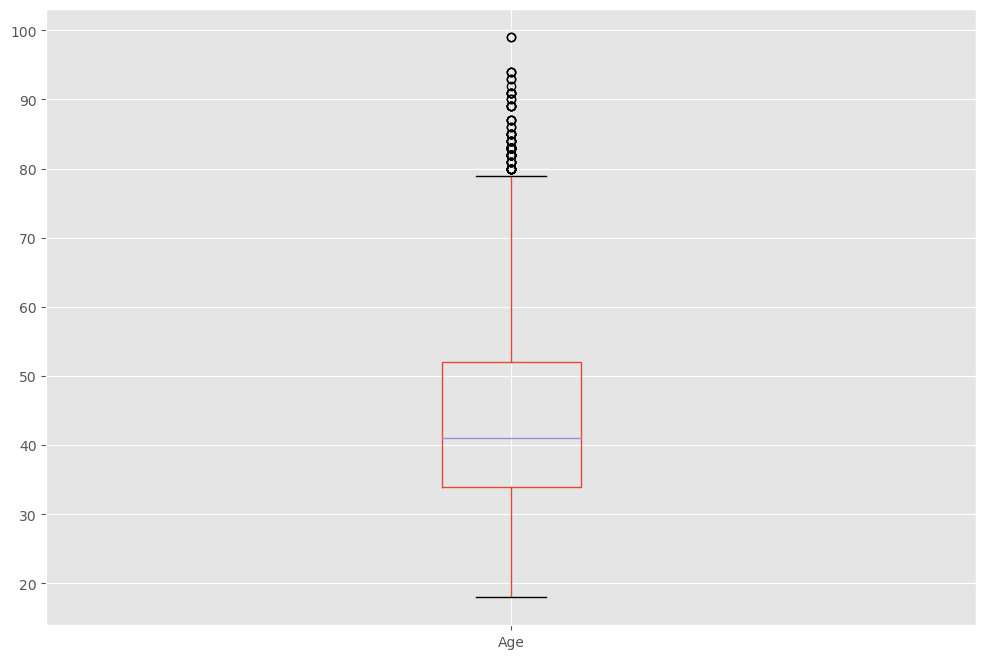

In [41]:
df_less_missing_rows.boxplot(column=["Age"])

count    23472.000000
mean         4.195552
std          1.110188
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

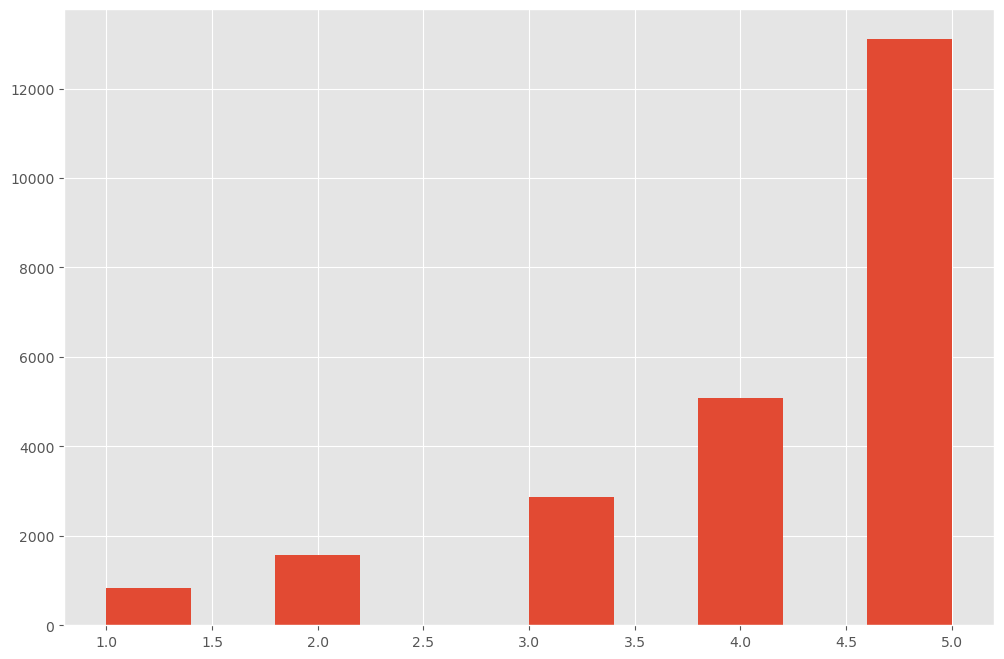

In [30]:
df_less_missing_rows["Rating"].hist()
df_less_missing_rows["Rating"].describe()

<Axes: >

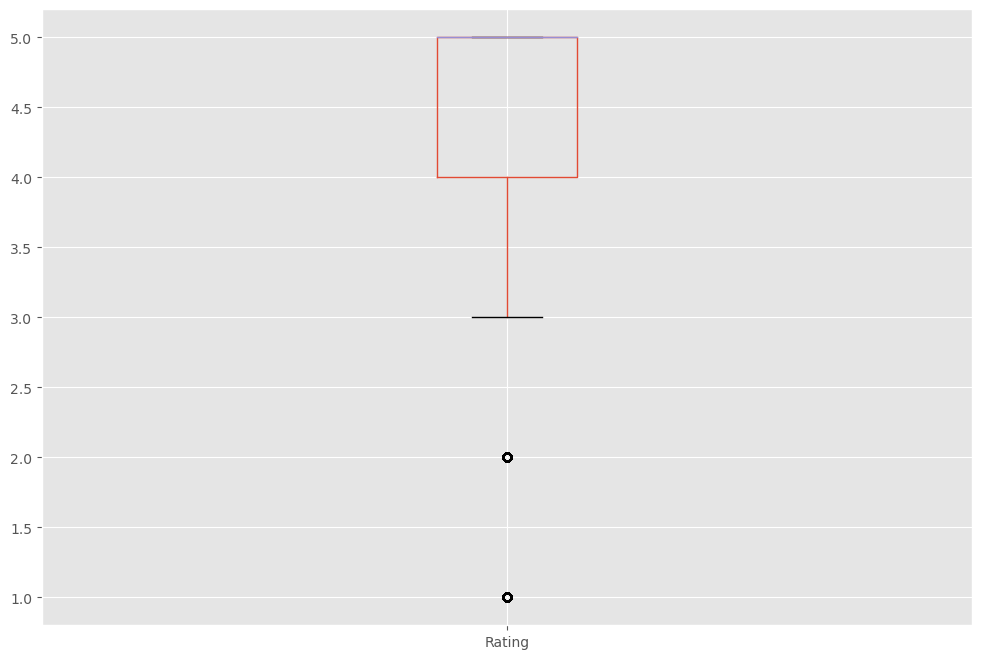

In [42]:
df_less_missing_rows.boxplot(column=["Rating"])

count    23472.000000
mean         0.822256
std          0.382305
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended IND, dtype: float64

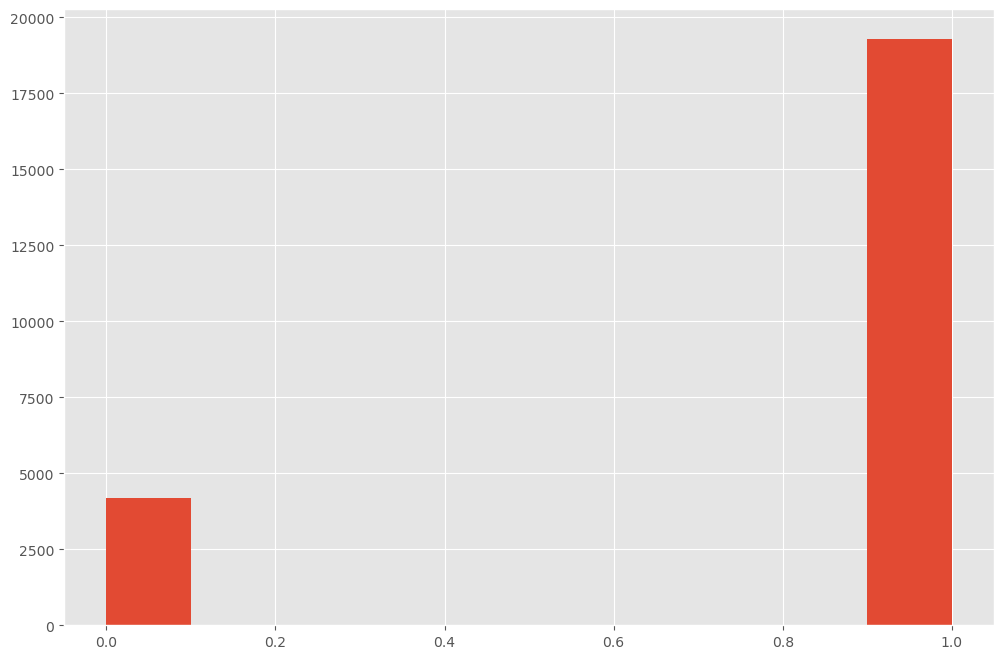

In [31]:
df_less_missing_rows["Recommended IND"].hist()
df_less_missing_rows["Recommended IND"].describe()

<Axes: >

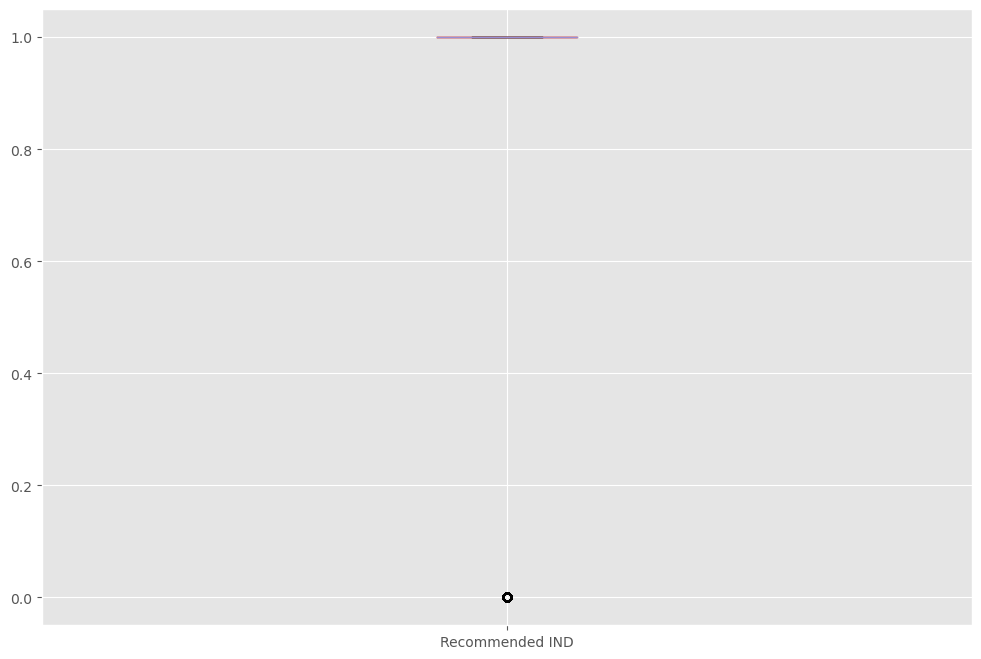

In [43]:
df_less_missing_rows.boxplot(column=["Recommended IND"])

count    23472.000000
mean         2.537151
std          5.703597
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

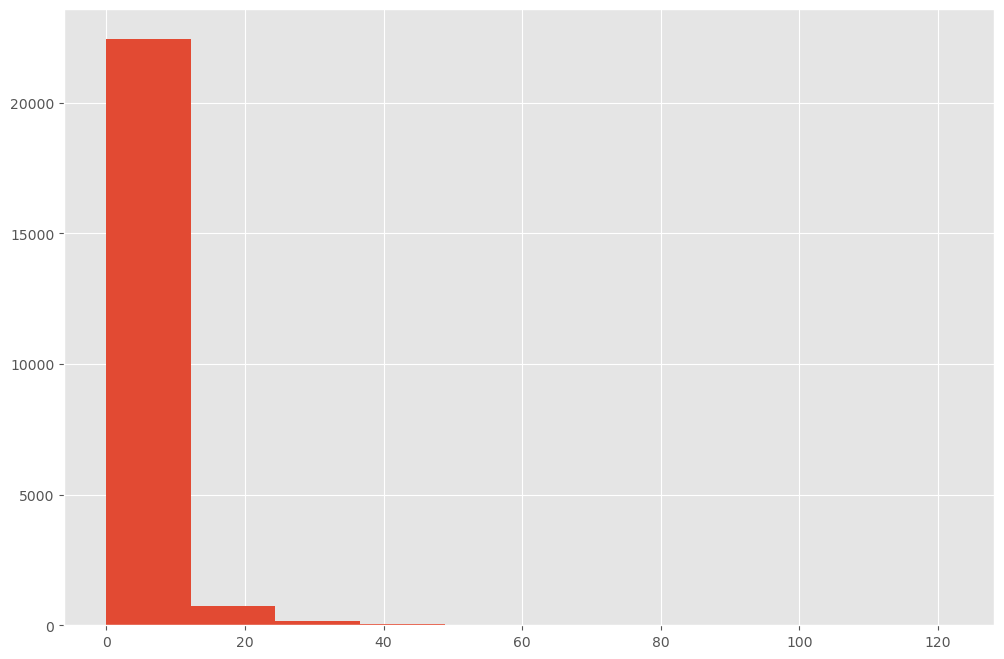

In [32]:
df_less_missing_rows["Positive Feedback Count"].hist()
df_less_missing_rows["Positive Feedback Count"].describe()

<Axes: >

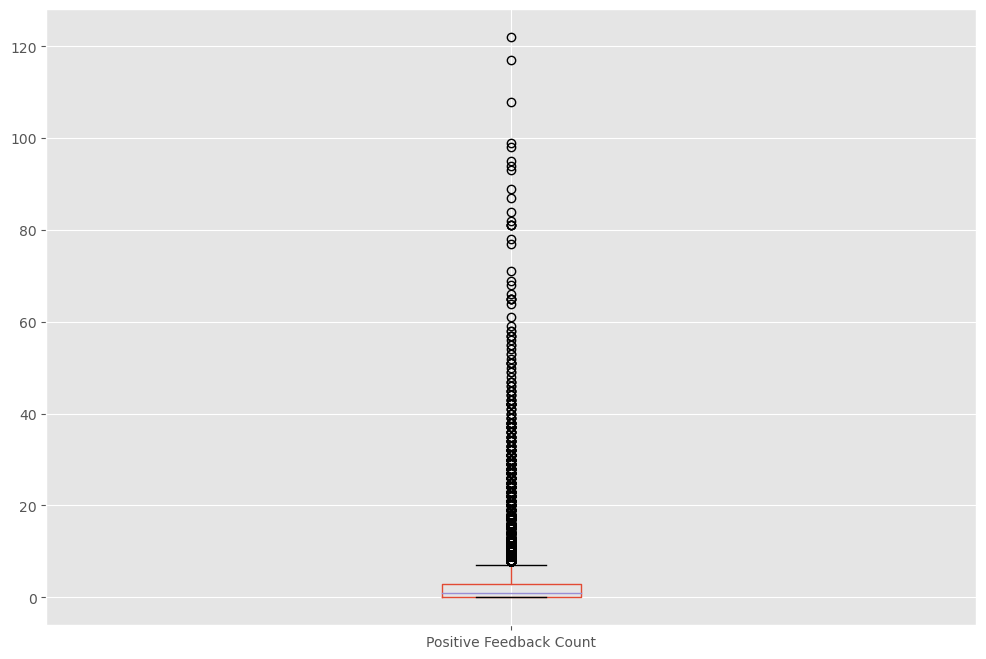

In [44]:
df_less_missing_rows.boxplot(column=["Positive Feedback Count"])

In [8]:
# Use the describe() method
#see above


<Axes: >

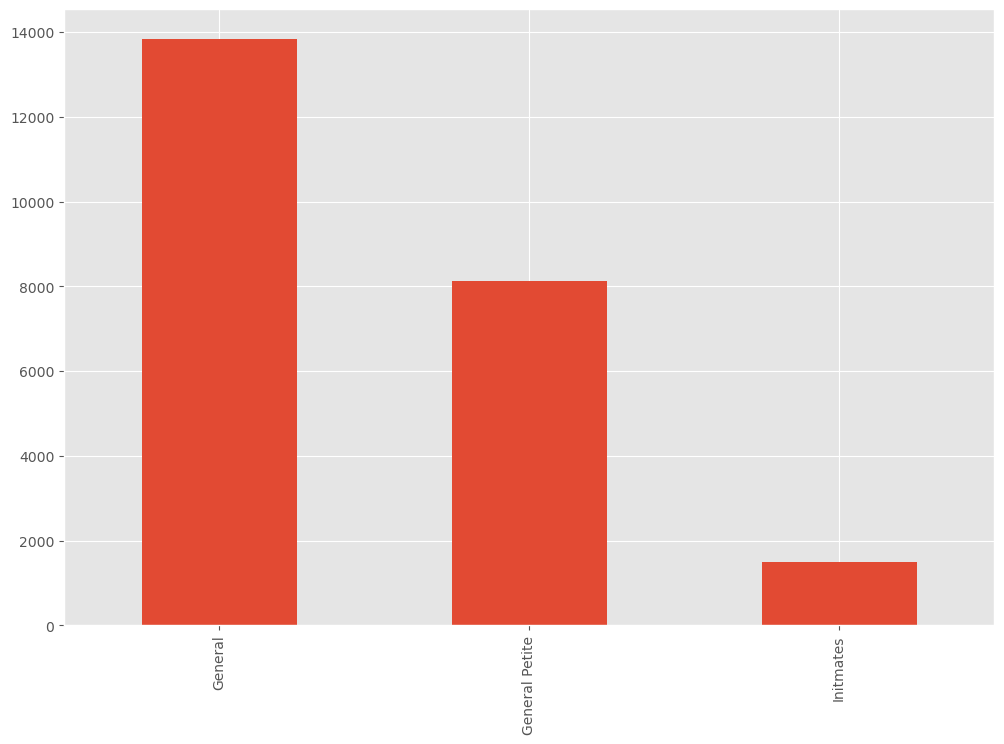

In [33]:
# Plot a bar chart
df_less_missing_rows["Division Name"].value_counts().plot.bar()

<Axes: >

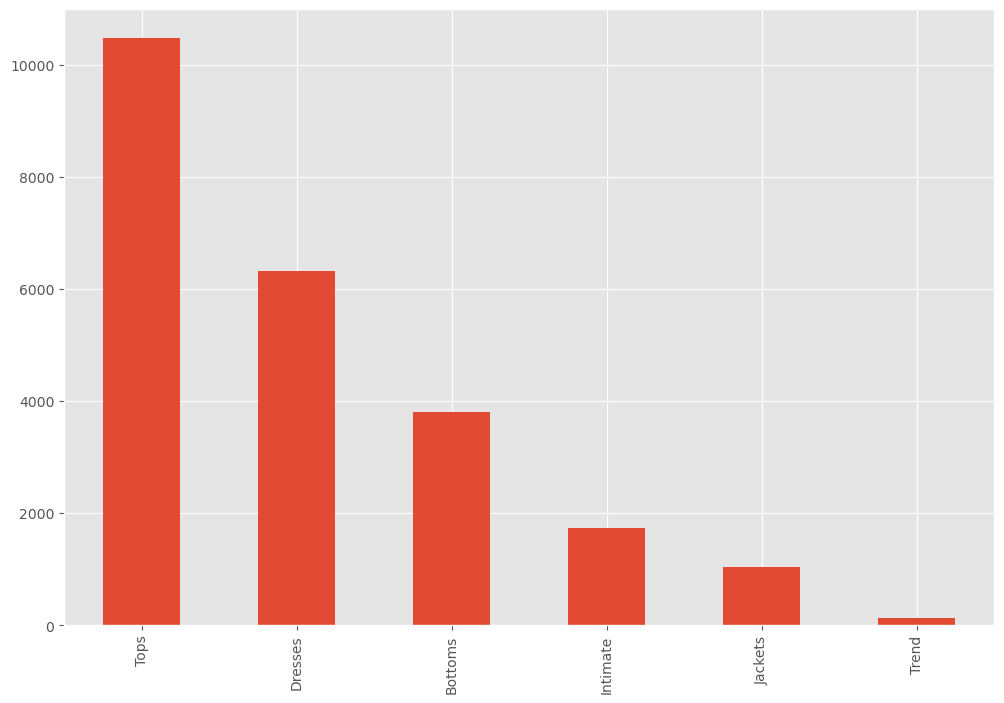

In [34]:
df_less_missing_rows["Department Name"].value_counts().plot.bar()

<Axes: >

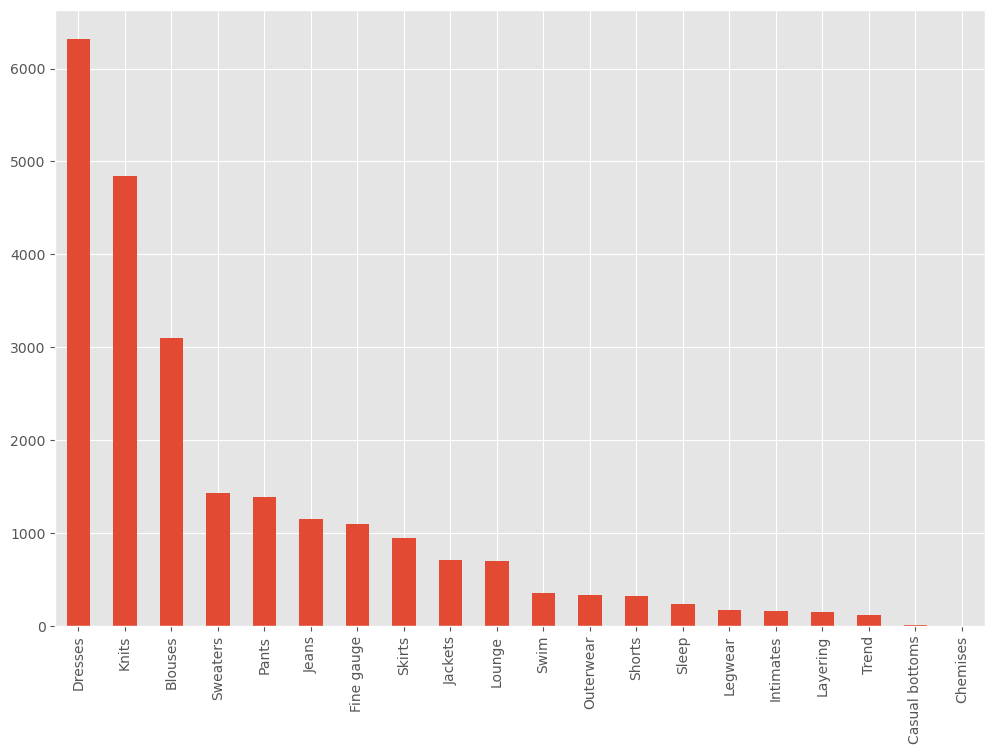

In [35]:
df_less_missing_rows["Class Name"].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [36]:
# Handle any outliers in your dataframe. The boxplot helped most with the visualization BUT despite what they've identified as outliers, I think they are appropriate for the dataset and I believe the best way to handle them is to leave them.

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [37]:
# Look for any irrelevant data in the dataframe. How will you handle it? 
# Without knowing the business question that this data is attempting to answer, I can't tell if any of the data is irrelevant

In [38]:
# Look for duplicates. How will you handle any duplicates? Duplicates removed, new df with removed duplicates is called df_dedupped2
df_dedupped = df_less_missing_rows.loc[:, ~df_less_missing_rows.columns.str.contains('^Unnamed')]
print(df_less_missing_rows.shape)
print(df_dedupped.shape)

key = ['Clothing ID','Age','Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count']
df_dedupped2 = df_dedupped.drop_duplicates(subset=key)

print(df_dedupped2.shape)


(23472, 17)
(23472, 16)
(23422, 16)


In [51]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

num_rows = len(df_dedupped2.index)
low_information_cols = [] 

for col in df_dedupped2.columns:
    cnts = df_dedupped2[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
        
#based on this method, none of the data is uninformative because it isn't repetitive


Review Text_ismissing: 96.60576%
False    22627
True       795
Name: Review Text_ismissing, dtype: int64

Division Name_ismissing: 100.00000%
False    23422
Name: Division Name_ismissing, dtype: int64

Department Name_ismissing: 100.00000%
False    23422
Name: Department Name_ismissing, dtype: int64

Class Name_ismissing: 100.00000%
False    23422
Name: Class Name_ismissing, dtype: int64



## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [70]:
# Try to convert all the strings in a column to lower or upper case. 
df_dedupped2['Title_lower'] = df_dedupped2['Title'].str.lower()
df_dedupped2.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,Title_lower
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,NaN
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,True,False,False,False,False,NaN
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,False,False,False,False,False,some major design flaws
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,my favorite buy!
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,False,False,False,False,False,flattering shirt
